# First let's import keras and take a look at the mnist

Using TensorFlow backend.


(60000, 28, 28)(60000,)(10000, 28, 28)(10000,)


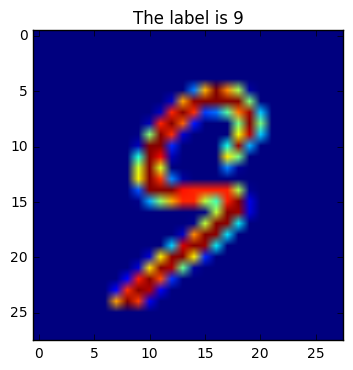

In [1]:
from keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

(train_images,train_labels),(test_images,test_labels)=mnist.load_data()
print (str(train_images.shape)+str(train_labels.shape)+str(test_images.shape)+str(test_labels.shape))

show_idx=np.random.choice(train_images.shape[0],1)[0]
plt.imshow(train_images[show_idx])
plt.title("The label is %s"%train_labels[show_idx])
plt.show()

# Build our model architecture

In [2]:
from keras import models
from keras import layers

network=models.Sequential()
network.add(layers.Dense(512,activation="relu",input_shape=(28*28,)))
network.add(layers.Dense(10,activation="softmax"))

Our network has 2 fully connected layers.

One has 512 units with activation function "relu". Another has 10 units as the categories of the Mnist dataset.And is's activation is "softmax".

Softmax is used for multi classification, while sigmoid is used for binary classification.

# Or, we can build our model in another way. Using the functional API

In [3]:
from keras import layers
from keras import models
input_tensor=layers.Input(shape=(784,))
x=layers.Dense(512,activation="relu")(input_tensor)
output_tensor=layers.Dense(10,activation="softmax")(x)

network=models.Model(input=input_tensor,output=output_tensor)

C:\Users\test07\Anaconda3\lib\site-packages\ipykernel\__main__.py:7: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`


# Next, we need to define our optimizer and loss function

In [4]:
network.compile(optimizer="rmsprop",
               loss="categorical_crossentropy",
               metrics=["accuracy"])

# Next, reshape our images shape

In [5]:
train_images=train_images.reshape((60000,28*28)).astype("float32")/255
test_images=test_images.reshape((10000,28*28)).astype("float32")/255

# Next, reshape our labels into one-hot

In [6]:
from keras.utils import to_categorical

train_labels=to_categorical(train_labels)
test_labels=to_categorical(test_labels)

train_labels[show_idx]

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.])

# Preparation is done. Train the network.

In [7]:
network.fit(train_images,train_labels,epochs=5,batch_size=128)

Epoch 1/5
60000/60000 [==============================] - 4s 65us/step - loss: 0.2544 - acc: 0.9267
Epoch 2/5
60000/60000 [==============================] - 3s 44us/step - loss: 0.1025 - acc: 0.9699
Epoch 3/5
60000/60000 [==============================] - 3s 42us/step - loss: 0.0686 - acc: 0.9787
Epoch 4/5
60000/60000 [==============================] - 3s 44us/step - loss: 0.0507 - acc: 0.9845
Epoch 5/5
60000/60000 [==============================] - 3s 48us/step - loss: 0.0386 - acc: 0.9883


# Evaluate the network

In [7]:
test_loss,test_acc=network.evaluate(test_images,test_labels)
print("Test loss:"+str(test_loss)+"\tTest accuracy:"+str(test_acc))

10000/10000 [==============================] - 1s 73us/step
Test loss:0.0760395036325	Test accuracy:0.9769
